# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

# Loading Data

In [4]:
file_path = r'C:\Users\ajay4\OneDrive\Documents\Resume\Data science course\Data\1.04.+Real-life+example.csv'
raw_data = pd.read_csv(file_path)

In [5]:
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


# Preprocessing

In [7]:
## Exploring the descriptive statics of the varianbles

In [8]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [11]:
# Determining the variable of interests

In [16]:
data = raw_data.drop(['Model'],axis=1)

In [18]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [20]:
# Dealing with missing values

In [22]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [24]:
data_no_mv = data.dropna(axis = 0)
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Exploring the pdfs

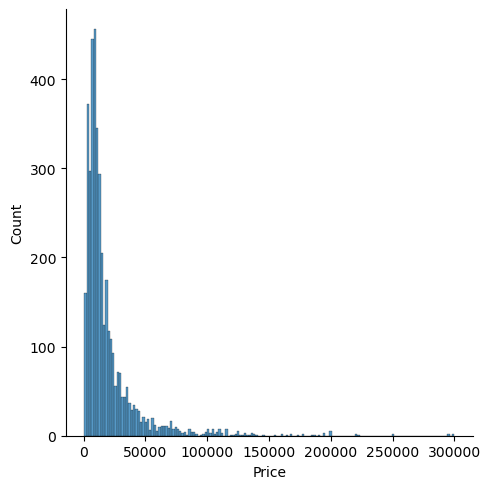

In [27]:
sns.displot(data_no_mv['Price'])

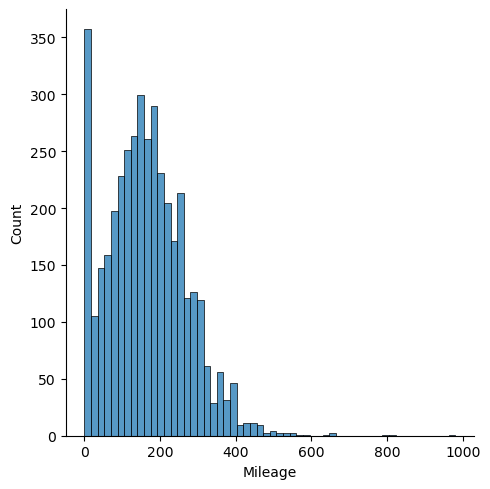

In [29]:
sns.displot(data_no_mv['Mileage'])

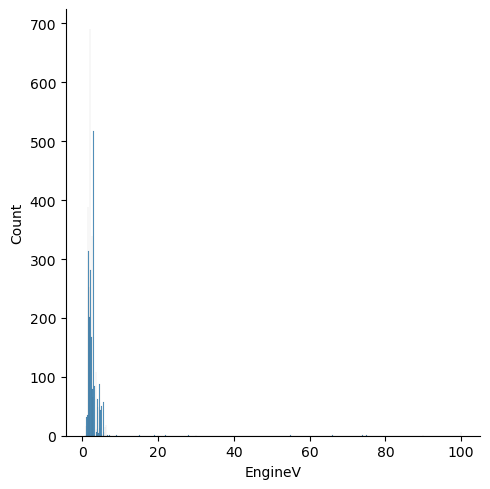

In [31]:
sns.displot(data_no_mv['EngineV'])

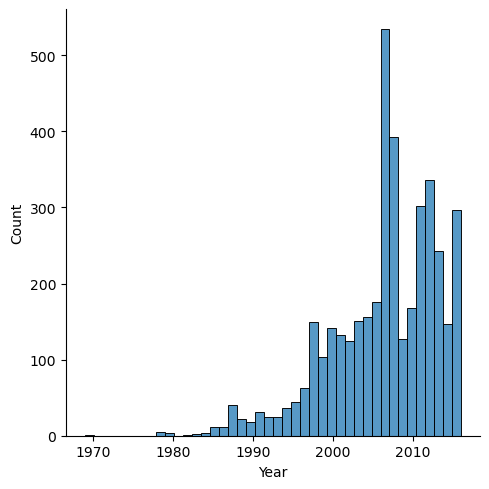

In [33]:
sns.displot(data_no_mv['Year'])

# Dealing with outliers

In [36]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


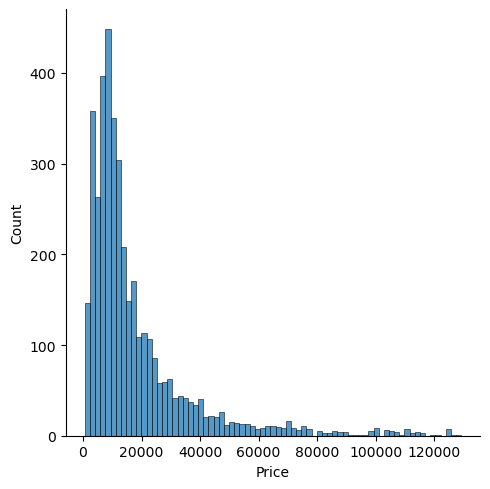

In [38]:
sns.displot(data_1['Price'])

In [40]:
q = data_no_mv['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3943,3943.000000,3943,3943.000000,3943.000000,3943,3943,3943.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1510,NaN,NaN,1825,3575,NaN
mean,NaN,17936.780614,NaN,161.414659,2.747497,NaN,NaN,2006.393102
std,NaN,19009.750360,NaN,95.940408,4.981033,NaN,NaN,6.593870
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21417.500000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


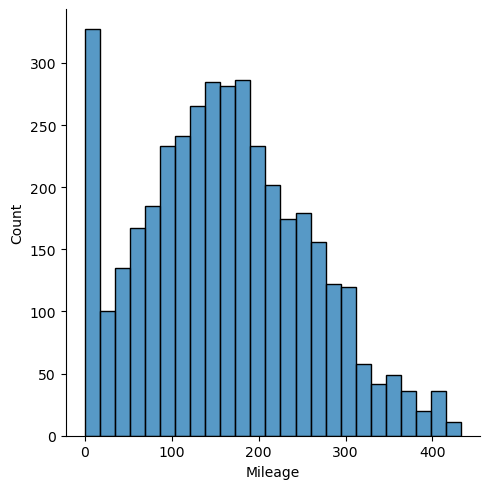

In [42]:
sns.displot(data_2['Mileage'])

In [44]:
data_3 = data_2[data_2['EngineV']<6.5]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3920,3920.000000,3920,3920.000000,3920.000000,3920,3920,3920.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1498,NaN,NaN,1818,3558,NaN
mean,NaN,17991.352031,NaN,161.209949,2.443304,NaN,NaN,2006.409184
std,NaN,19043.203478,NaN,95.980959,0.946242,NaN,NaN,6.593734
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


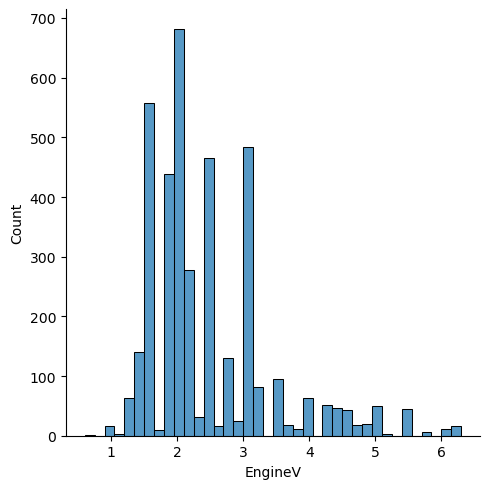

In [46]:
sns.displot(data_3['EngineV'])

In [48]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


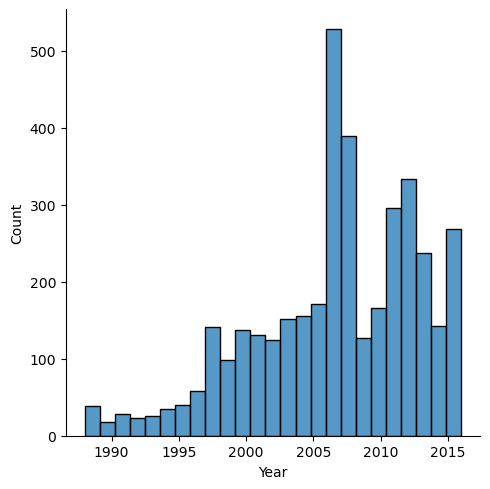

In [50]:
sns.displot(data_4['Year'])

In [52]:
data_cleaned = data_4.reset_index(drop = True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


# Checking OLS assumptions

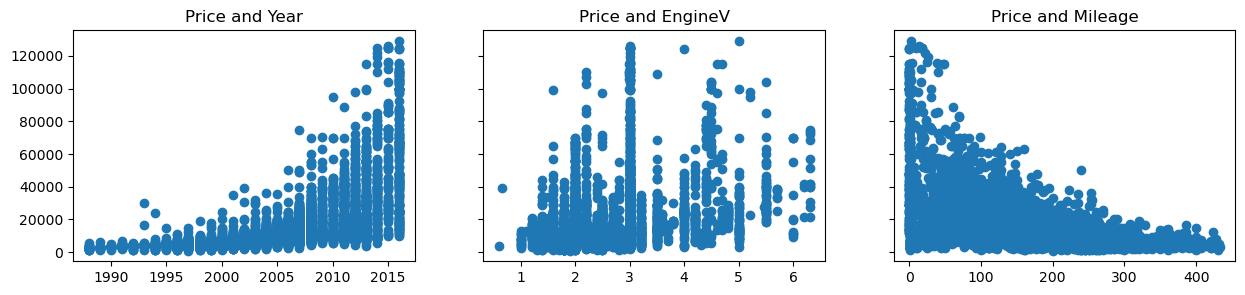

In [55]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

# Relaxing the assumptions

In [58]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned = data_cleaned.drop(['Price'],axis =1)
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3861,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3862,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3863,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3864,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


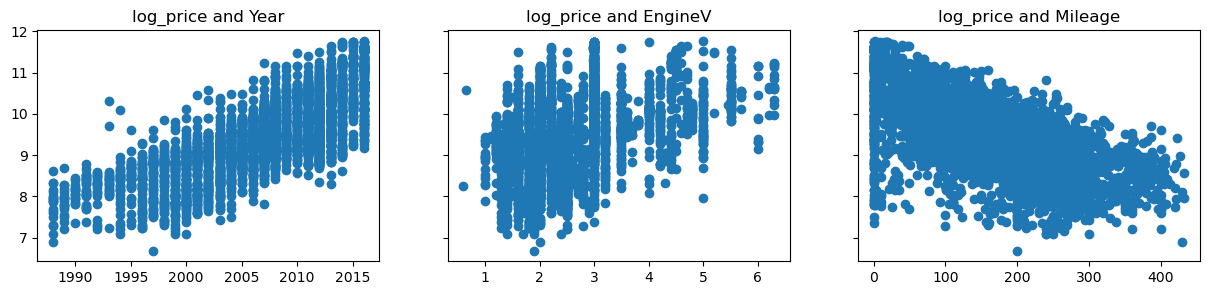

In [60]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')
plt.show()

# Multicolinearity

In [63]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [67]:
vif

,vif,Features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


In [69]:
data_no_multicolinearity = data_cleaned.drop(['Year'],axis = 1 )

# Create dummy vaiables

In [75]:
data_with_dummy = pd.get_dummies(data_no_multicolinearity, drop_first = True)
data_with_dummy.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


# Rearrange a bit

In [78]:
data_with_dummy.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [80]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [82]:
data_preprocessed = data_with_dummy[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


# Linear Regression Model

# Declare inputs and targets

In [93]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

# Scale the data

In [96]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

# Train and Test split

In [103]:
from sklearn.model_selection import train_test_split

In [105]:
x_train , x_test , y_train, y_test = train_test_split(inputs_scaled , targets , test_size = 0.2, random_state = 365)

# Create Regression

In [108]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [110]:
y_hat = reg.predict(x_train)

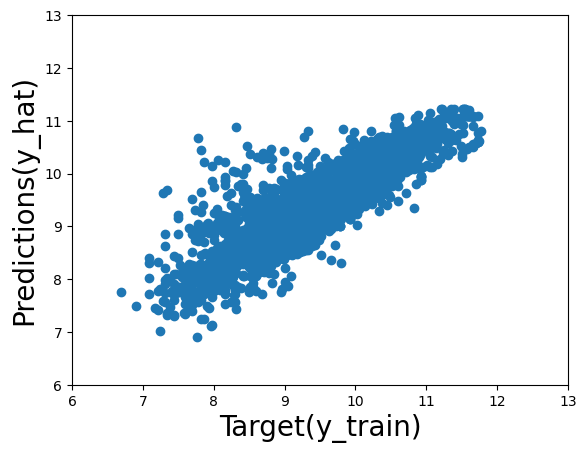

In [112]:
plt.scatter(y_train,y_hat)
plt.xlabel('Target(y_train)',size  = 20)
plt.ylabel('Predictions(y_hat)',size = 20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Resdiual Pdf')

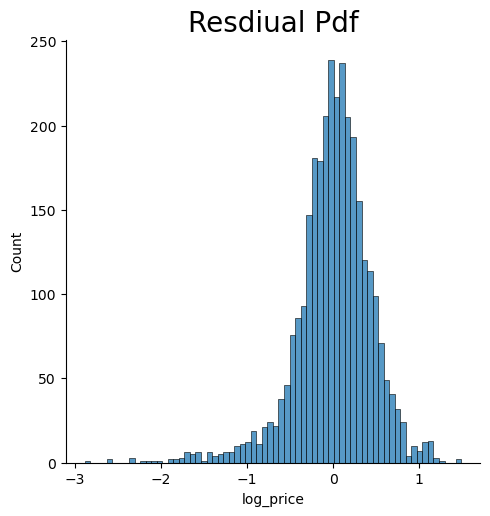

In [121]:
sns.displot(y_train-y_hat)
plt.title('Resdiual Pdf',size = 20)

In [125]:
reg.score(x_train,y_train)

0.7415645182486199

# Finding the weight and bias

In [128]:
reg.intercept_

9.413280072375791

In [130]:
reg.coef_

array([-0.44838367,  0.21092609,  0.01217236,  0.01091936, -0.13381235,
       -0.18243069, -0.05551416, -0.08742151, -0.15127967, -0.10115164,
       -0.19711525, -0.1281566 , -0.16265036, -0.12418232, -0.03326347,
       -0.14940858,  0.31944559])

In [132]:
reg_summary = pd.DataFrame(inputs.columns.values , columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448384
1,EngineV,0.210926
2,Brand_BMW,0.012172
3,Brand_Mercedes-Benz,0.010919
4,Brand_Mitsubishi,-0.133812
5,Brand_Renault,-0.182431
6,Brand_Toyota,-0.055514
7,Brand_Volkswagen,-0.087422
8,Body_hatch,-0.151280
9,Body_other,-0.101152


# with test data

In [135]:
y_hat_test = reg.predict(x_test)

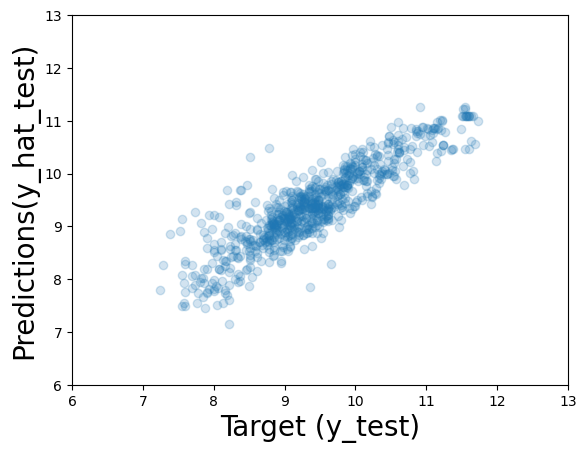

In [137]:
plt.scatter(y_test,y_hat_test,alpha = 0.2)
plt.xlabel('Target (y_test)',size = 20)
plt.ylabel('Predictions(y_hat_test)',size = 20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [139]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
df_pf.head()

,Prediction
0,10650.438709
1,8041.555683
2,6799.069945
3,7606.977689
4,11309.799759


In [141]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10650.438709,NaN
1,8041.555683,7900.0
2,6799.069945,NaN
3,7606.977689,NaN
4,11309.799759,NaN
...,...,...
769,14874.949923,6950.0
770,5735.556226,NaN
771,13623.775492,NaN
772,28096.133846,NaN


In [145]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0    7.740664
1    9.487972
2    8.999619
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [155]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target,Resdiual,Difference%
0,10650.438709,2300.000000,NaN,NaN
1,8041.555683,13200.000000,-141.555683,1.791844
2,6799.069945,8100.000000,NaN,NaN
3,7606.977689,6400.000000,NaN,NaN
4,11309.799759,9150.000000,NaN,NaN
5,21221.252219,20000.000000,-7021.252219,49.445438
6,19979.061768,38888.000000,NaN,NaN
7,14980.776113,17800.000000,NaN,NaN
8,8392.770114,7150.000000,3557.229886,29.767614
9,33073.223568,41000.000000,NaN,NaN


In [156]:
df_pf['Resdiual'] = df_pf['Target']-df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Resdiual']/df_pf['Target']*100)
df_pf.describe()

,Prediction,Target,Resdiual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16170.746881,18612.010504,2441.263622,33.814041
std,13742.956902,20953.006281,10835.145339,48.272151
min,1284.843010,1400.000000,-29171.365746,0.056793
25%,7489.039002,6999.250000,-2013.351405,11.277214
50%,11561.730997,11500.000000,150.474574,23.239276
75%,19726.158072,20500.000000,3293.698161,39.023878
max,77447.771561,124000.000000,80642.598057,507.418465


In [159]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x: '%2f'%x)
df_pf.sort_values(by = ['Difference%'])

,Prediction,Target,Resdiual,Difference%
264,11493.468837,11500.000000,6.531163,0.056793
742,16985.248181,16999.000000,13.751819,0.080898
60,12486.363039,12500.000000,13.636961,0.109096
127,23257.548035,23200.000000,-57.548035,0.248052
308,8876.915349,8900.000000,23.084651,0.259378
242,7478.348510,7500.000000,21.651490,0.288687
698,30600.222849,30500.000000,-100.222849,0.328600
379,17733.154392,17800.000000,66.845608,0.375537
114,27429.729872,27300.000000,-129.729872,0.475201
317,11560.121320,11500.000000,-60.121320,0.522794
